### Imports

In [1]:
! pip install pandas
! pip install 'keras>=2.0,<3'
! pip install transformers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, pipeline

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
The system cannot find the file specified.


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\Adi\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset

In [2]:
df = pd.read_csv('sample_data/racism-dataset.csv', sep=',', index_col=0)
df.head(10)

,label,text
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...
10,0,@user @user welcome here ! i'm it's so #gr8 !


In [3]:
MAX_PREDOMINANT_LABEL_SAMPLES = 10000

dfNonHate = df[df["label"] == 0].head(MAX_PREDOMINANT_LABEL_SAMPLES)
dfHate = df[df["label"] == 1]

df = pd.concat([dfNonHate, dfHate])

In [4]:
dfNonHate.head(10)

,label,text
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...
10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
dfHate.head(10)

,label,text
14,1,@user #cnn calls #michigan middle school 'buil...
15,1,no comment! in #australia #opkillingbay #se...
18,1,retweet if you agree!
24,1,@user @user lumpy says i am a . prove it lumpy.
35,1,it's unbelievable that in the 21st century we'...
57,1,@user lets fight against #love #peace
69,1,ð©the white establishment can't have blk fol...
78,1,"@user hey, white people: you can call people '..."
83,1,how the #altright uses &amp; insecurity to lu...
112,1,@user i'm not interested in a #linguistics tha...


### Train & test splits

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.4, random_state=42)

print('train data length:', len(X_train))
print('test data length:', len(X_test))

train data length: 7345
test data length: 4897


In [7]:
dfTrain = pd.DataFrame(list(zip(X_train, y_train)), columns =['text', 'label'])
dfTrain.head()

,text,label
0,keeping to my happiness goals for the month - ...,0
1,@user as a huge @user fan i'm excited for liv...,0
2,ððlove girlsðð #bihday #yuiko#pa...,0
3,"this much #hatred, #xenophobia, #islamophobia,...",1
4,@user can't wait... excited to watch lemans th...,0


In [8]:
dfTest = pd.DataFrame(list(zip(X_test, y_test)), columns =['text', 'label'])
dfTest.head()

,text,label
0,i worked to had for this #highschoolgraduation...,0
1,so proud to have a mayor like @user who isnt a...,1
2,#bihday #shout #out to my broda @user smile ...,0
3,i am wholesome. #i_am #positive #affirmation,0
4,#nazi #swastika #ebay! #trump #donaldtrump #re...,1


In [9]:
def print_confusion_matrix(y_true, y_pred, title):
    title += "    f1: " + "{:.2f}".format(f1_score(y_test, y_pred, average="macro"))
    matrix = confusion_matrix(y_true, y_pred)
    seaborn.heatmap(matrix, annot=True, fmt='g')
    plt.title(title)

### BERTs

##### Pre-trained Models - Model 1

In [10]:
# source: https://huggingface.co/patrickquick/BERTicelli?text=Keep+up+the+good+hard+work.

tokenizer1 = AutoTokenizer.from_pretrained("patrickquick/BERTicelli")
model1 = AutoModelForSequenceClassification.from_pretrained("patrickquick/BERTicelli")
classifier1 = pipeline("text-classification", model=model1, tokenizer=tokenizer1)

Device set to use cpu


In [13]:
y_pred = [0 if classifier1(sentence)[0]['label'] == 'NOT' else 1 for sentence in dfTest['text']]

In [14]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4021
           1       0.43      0.26      0.32       876

    accuracy                           0.80      4897
   macro avg       0.64      0.59      0.60      4897
weighted avg       0.78      0.80      0.79      4897



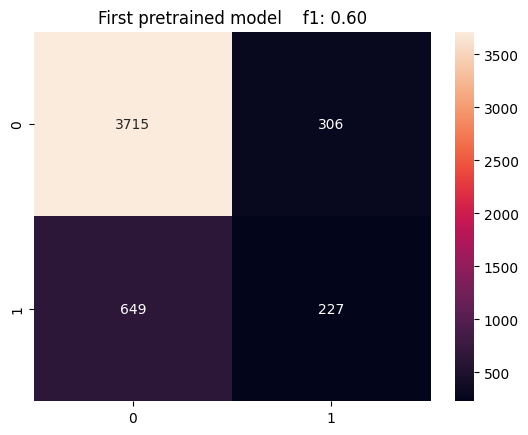

In [15]:
print_confusion_matrix(y_test, y_pred, "First pretrained model")

##### Pre-trained Models - Model 2

In [17]:
# source: https://huggingface.co/MilaNLProc/bert-base-uncased-ear-mlma

tokenizer2 = AutoTokenizer.from_pretrained("MilaNLProc/bert-base-uncased-ear-mlma")
model2 = AutoModelForSequenceClassification.from_pretrained("MilaNLProc/bert-base-uncased-ear-mlma")
classifier2 = pipeline("text-classification", model=model2, tokenizer=tokenizer2)

C:\Users\Adi\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Adi\.cache\huggingface\hub\models--MilaNLProc--bert-base-uncased-ear-mlma. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [18]:
y_pred = [0 if classifier2(sentence)[0]['label'] == 'non-hateful' else 1 for sentence in dfTest['text']]

In [19]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      0.49      0.63      4021
           1       0.25      0.77      0.37       876

    accuracy                           0.54      4897
   macro avg       0.58      0.63      0.50      4897
weighted avg       0.79      0.54      0.59      4897



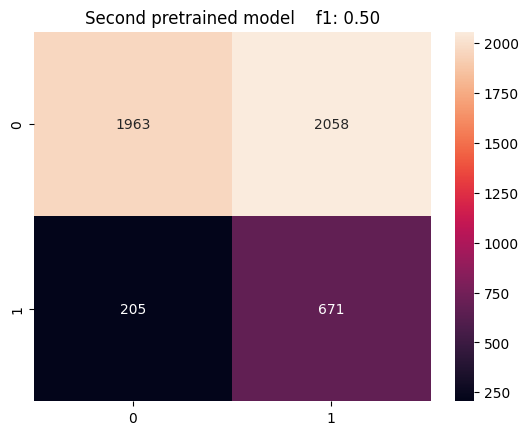

In [20]:
print_confusion_matrix(y_test, y_pred, "Second pretrained model")

##### Pre-trained Models - Model 3

In [21]:
# source: https://huggingface.co/facebook/roberta-hate-speech-dynabench-r4-target

tokenizer3 = AutoTokenizer.from_pretrained("facebook/roberta-hate-speech-dynabench-r4-target")
model3 = AutoModelForSequenceClassification.from_pretrained("facebook/roberta-hate-speech-dynabench-r4-target")
classifier3 = pipeline("text-classification", model=model3, tokenizer=tokenizer3)

C:\Users\Adi\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Adi\.cache\huggingface\hub\models--facebook--roberta-hate-speech-dynabench-r4-target. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [22]:
y_pred = [0 if classifier3(sentence)[0]['label'] == 'nothate' else 1 for sentence in dfTest['text']]

In [23]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4021
           1       0.53      0.19      0.28       876

    accuracy                           0.82      4897
   macro avg       0.69      0.58      0.59      4897
weighted avg       0.79      0.82      0.79      4897



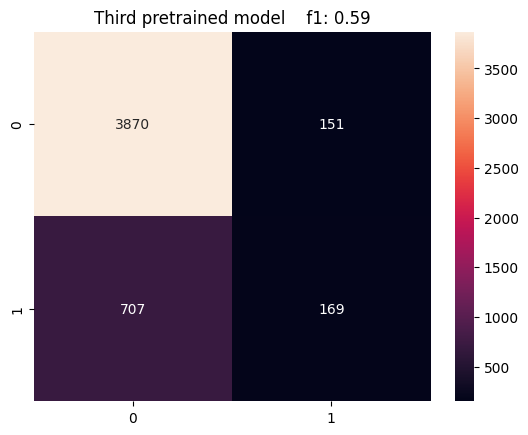

In [24]:
print_confusion_matrix(y_test, y_pred, "Third pretrained model")

##### Pre-trained Models - Model 4

In [25]:
# source: https://huggingface.co/Hate-speech-CNERG/bert-base-uncased-hatexplain

tokenizer4 = AutoTokenizer.from_pretrained("Hate-speech-CNERG/bert-base-uncased-hatexplain")
model4 = AutoModelForSequenceClassification.from_pretrained("Hate-speech-CNERG/bert-base-uncased-hatexplain")
classifier4 = pipeline("text-classification", model=model4, tokenizer=tokenizer4)

C:\Users\Adi\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Adi\.cache\huggingface\hub\models--Hate-speech-CNERG--bert-base-uncased-hatexplain. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [26]:
y_pred = [0 if classifier4(sentence)[0]['label'] == 'normal' else 1 for sentence in dfTest['text']]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [27]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4021
           1       0.51      0.07      0.13       876

    accuracy                           0.82      4897
   macro avg       0.67      0.53      0.51      4897
weighted avg       0.77      0.82      0.76      4897



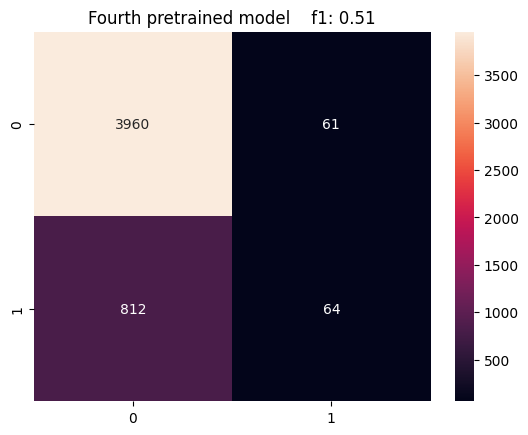

In [28]:
print_confusion_matrix(y_test, y_pred, "Fourth pretrained model")

##### Pre-trained Models - Model 5

In [29]:
# source: https://huggingface.co/Hate-speech-CNERG/dehatebert-mono-english

tokenizer5 = AutoTokenizer.from_pretrained("Hate-speech-CNERG/dehatebert-mono-english")
model5 = AutoModelForSequenceClassification.from_pretrained("Hate-speech-CNERG/dehatebert-mono-english")
classifier5 = pipeline("text-classification", model=model5, tokenizer=tokenizer5)

C:\Users\Adi\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Adi\.cache\huggingface\hub\models--Hate-speech-CNERG--dehatebert-mono-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


In [30]:
y_pred = [0 if classifier5(sentence)[0]['label'] == 'NON_HATE' else 1 for sentence in dfTest['text']]

In [31]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4021
           1       0.34      0.38      0.36       876

    accuracy                           0.76      4897
   macro avg       0.60      0.61      0.60      4897
weighted avg       0.77      0.76      0.76      4897



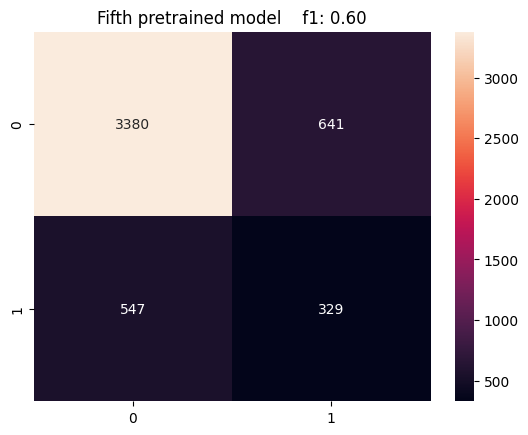

In [32]:
print_confusion_matrix(y_test, y_pred, "Fifth pretrained model")

### Fine-tuned BERTs

In [11]:
# Convert to PyTorch datasets
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

##### Fine-tuned BERT Model 1

In [24]:
# source: https://huggingface.co/patrickquick/BERTicelli?text=Keep+up+the+good+hard+work.

# Tokenize the texts
tokenizer1 = AutoTokenizer.from_pretrained("patrickquick/BERTicelli")

train_encodings = tokenizer1(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer1(X_test.tolist(), truncation=True, padding=True, max_length=128)

train_dataset = CustomDataset(train_encodings, y_train.tolist())
test_dataset = CustomDataset(test_encodings, y_test.tolist())

In [27]:
# Load the pre-trained model
model1 = AutoModelForSequenceClassification.from_pretrained("patrickquick/BERTicelli", num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results1',
    num_train_epochs=3,        
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64, 
    warmup_steps=500,              
    weight_decay=0.01, 
    logging_dir='./logs1',           
    logging_steps=10,             
    evaluation_strategy="epoch",   
    save_strategy="epoch",         
    load_best_model_at_end=True,   
)

# Define the Trainer
trainer = Trainer(
    model=model1,                       
    args=training_args,              
    train_dataset=train_dataset,       
    eval_dataset=test_dataset        
)

In [28]:
# Fine-tune the model
trainer.train()

# Evaluate the model on the test set
results1 = trainer.evaluate()
print(results1)

Epoch,Training Loss,Validation Loss
1,0.283500,0.233395
2,0.217800,0.234781
3,0.008100,0.290950


{'eval_loss': 0.2333950698375702, 'eval_runtime': 247.8108, 'eval_samples_per_second': 19.761, 'eval_steps_per_second': 0.311, 'epoch': 3.0}


In [29]:
# Save the model and tokenizer
model1.save_pretrained('./fine-tuned-model1')
tokenizer1.save_pretrained('./fine-tuned-model1')

('./fine-tuned-model1\\tokenizer_config.json',
 './fine-tuned-model1\\special_tokens_map.json',
 './fine-tuned-model1\\vocab.txt',
 './fine-tuned-model1\\added_tokens.json',
 './fine-tuned-model1\\tokenizer.json')

In [30]:
# Generate predictions on the test set
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)

In [31]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4021
           1       0.80      0.76      0.78       876

    accuracy                           0.92      4897
   macro avg       0.87      0.86      0.87      4897
weighted avg       0.92      0.92      0.92      4897



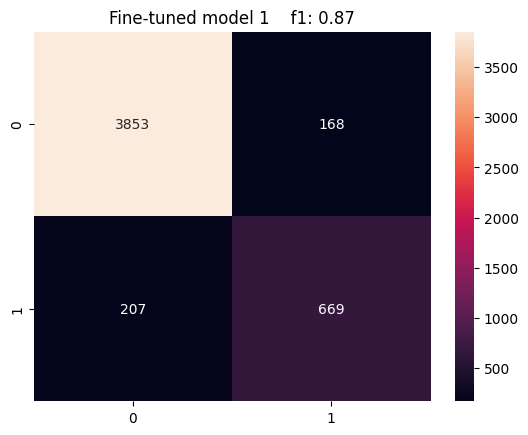

In [32]:
print_confusion_matrix(y_test, y_pred, "Fine-tuned model 1")

##### Fine-tuned BERT Model 5

In [ ]:
# source: https://huggingface.co/Hate-speech-CNERG/dehatebert-mono-english

# Tokenize the texts
tokenizer5 = AutoTokenizer.from_pretrained("Hate-speech-CNERG/dehatebert-mono-english")

train_encodings = tokenizer5(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer5(X_test.tolist(), truncation=True, padding=True, max_length=128)

train_dataset = CustomDataset(train_encodings, y_train.tolist())
test_dataset = CustomDataset(test_encodings, y_test.tolist())

In [ ]:
# Load the pre-trained model
model5 = AutoModelForSequenceClassification.from_pretrained("Hate-speech-CNERG/dehatebert-mono-english", num_labels=2)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',    
    num_train_epochs=3,        
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64, 
    warmup_steps=500,              
    weight_decay=0.01,           
    logging_dir='./logs',        
    logging_steps=10,             
    evaluation_strategy="epoch",   
    save_strategy="epoch",         
    load_best_model_at_end=True,   
)

# Define the Trainer
trainer = Trainer(
    model=model5,                       
    args=training_args,              
    train_dataset=train_dataset,       
    eval_dataset=test_dataset        
)

C:\Users\Adi\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [13]:
# Fine-tune the model
trainer.train()

# Evaluate the model on the test set
results5 = trainer.evaluate()
print(results5)

Epoch,Training Loss,Validation Loss
1,0.292800,0.252511
2,0.203800,0.258996
3,0.122800,0.260027


{'eval_loss': 0.25251081585884094, 'eval_runtime': 178.0766, 'eval_samples_per_second': 27.499, 'eval_steps_per_second': 0.432, 'epoch': 3.0}


In [20]:
# Save the model and tokenizer
model5.save_pretrained('./fine-tuned-model5')
tokenizer5.save_pretrained('./fine-tuned-model5')

('./fine-tuned-model5\\tokenizer_config.json',
 './fine-tuned-model5\\special_tokens_map.json',
 './fine-tuned-model5\\vocab.txt',
 './fine-tuned-model5\\added_tokens.json',
 './fine-tuned-model5\\tokenizer.json')

In [21]:
# Generate predictions on the test set
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(-1)

In [22]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4021
           1       0.75      0.74      0.75       876

    accuracy                           0.91      4897
   macro avg       0.85      0.84      0.85      4897
weighted avg       0.91      0.91      0.91      4897



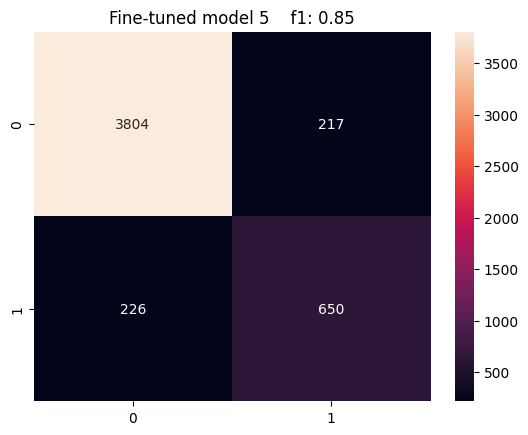

In [23]:
print_confusion_matrix(y_test, y_pred, "Fine-tuned model 5")